In [1]:
def print_df(df):
    print(df.to_string(index=False))

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.jleague.co/standings/j1/2024/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')
headers = [header.text.strip().replace(' ', '') for header in table.find_all('th')]
rows = []
club_links = []
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    cols_text = [col.text.strip() for col in cols]
    cols_text[-1] = '-'.join(cols_text[-1].split()) 
    club_link = row.find('a')['href']
    cols_text.insert(1, f"https://www.jleague.co{club_link}")
    club_links.append(f"https://www.jleague.co{club_link}")
    rows.append(cols_text)

    
headers.insert(1, 'Link')
df = pd.DataFrame(rows, columns=headers)
df.rename(columns={'CLUB': 'Team Name', 'POS' : 'Position', 'FORM' : 'Form', 'PTS' : 'Points'}, inplace=True)
df['Team Name'] = df['Team Name'].replace('Yokohama F･Marinos', 'Yokohama F.Marinos')
print_df(df)


Position                                                     Link                  Team Name  P  W  D  L GF GA  GD Points      Form
       1                https://www.jleague.co/clubs/Vissel-Kobe/                Vissel Kobe 38 21  9  8 61 36  25     72   W-D-D-W
       2        https://www.jleague.co/clubs/Sanfrecce-Hiroshima/        Sanfrecce Hiroshima 38 19 11  8 72 43  29     68   L-L-W-L
       3          https://www.jleague.co/clubs/FC-Machida-Zelvia/          FC Machida Zelvia 38 19  9 10 54 34  20     66   L-W-W-L
       4                https://www.jleague.co/clubs/Gamba-Osaka/                Gamba Osaka 38 18 12  8 49 35  14     66     W-W-W
       5            https://www.jleague.co/clubs/Kashima-Antlers/            Kashima Antlers 38 18 11  9 60 41  19     65 W-D-D-W-W
       6                https://www.jleague.co/clubs/Tokyo-Verdy/                Tokyo Verdy 38 14 14 10 51 51   0     56     D-L-D
       7                   https://www.jleague.co/clubs/FC-TOKYO/           

In [3]:
df.dtypes

Position     object
Link         object
Team Name    object
P            object
W            object
D            object
L            object
GF           object
GA           object
GD           object
Points       object
Form         object
dtype: object

In [4]:
df['GF'] = df['GF'].astype(int)
df['GA'] = df['GA'].astype(int)
df['GD'] = df['GD'].astype(int)
df['Position'] = df['Position'].astype(int)
df['Points'] = df['Points'].astype(int)
df['P'] = df['P'].astype(int)
df['W'] = df['W'].astype(int)
df['D'] = df['D'].astype(int)
df['L'] = df['L'].astype(int)
df['Team Name'] = df['Team Name'].astype(str)
df['Form'] = df['Form'].astype(str)

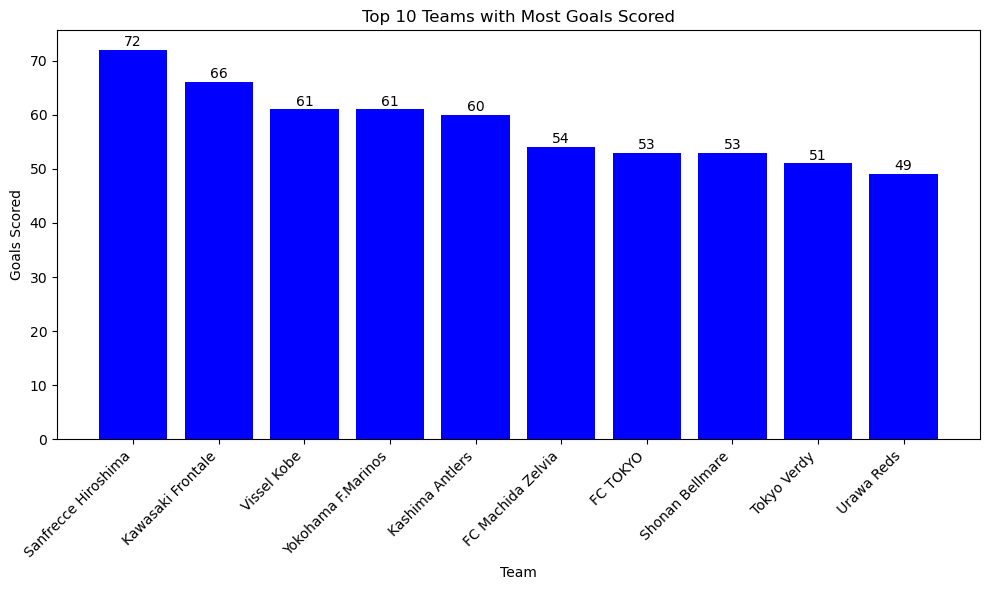

In [5]:
top_scorers = df.sort_values(by='GF', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_scorers['Team Name'], top_scorers['GF'], color='blue')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.title('Top 10 Teams with Most Goals Scored')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for index, value in enumerate(top_scorers['GF']):
    plt.text(index, value + 0.15, str(value), ha='center', va='bottom')
plt.show()


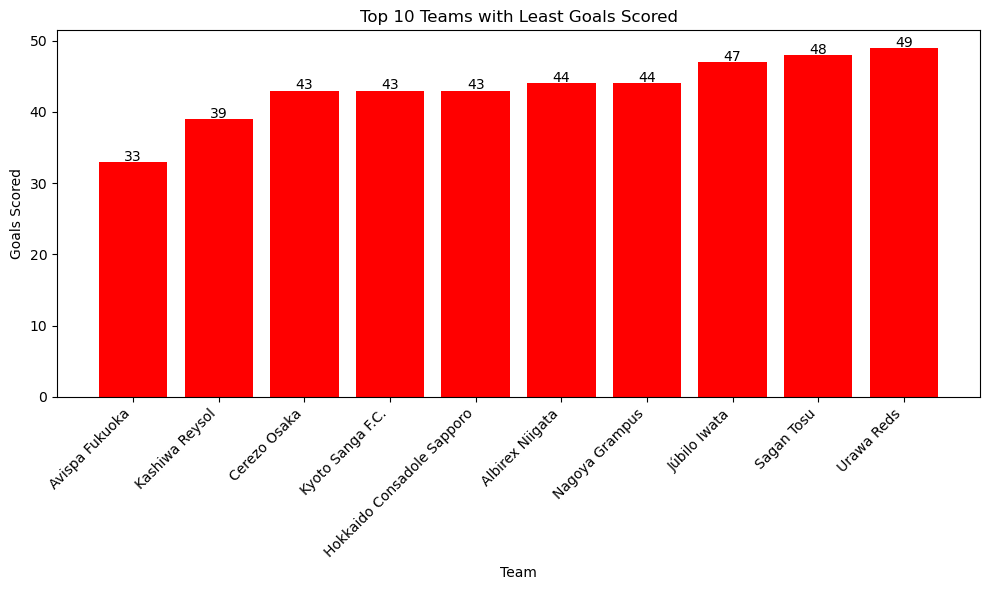

In [6]:
less_scorers = df.sort_values(by='GF', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(less_scorers['Team Name'], less_scorers['GF'], color = 'red')
for index, value in enumerate(less_scorers['GF']):
    plt.text(index, value + 0.15, str(value), ha='center')
plt.title('Top 10 Teams with Least Goals Scored')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
grouped = df.groupby('GF')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Total Goals Scored', 'Count of Teams', 'Team Names']

grouped = grouped.sort_values(by='Total Goals Scored', ascending=False).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Total Goals Scored  Count of Teams                                                 Team Names
                 72               1                                        Sanfrecce Hiroshima
                 66               1                                          Kawasaki Frontale
                 61               2                            Vissel Kobe, Yokohama F.Marinos
                 60               1                                            Kashima Antlers
                 54               1                                          FC Machida Zelvia
                 53               2                                  FC TOKYO, Shonan Bellmare
                 51               1                                                Tokyo Verdy
                 49               2                                    Gamba Osaka, Urawa Reds
                 48               1                                                 Sagan Tosu
                 47               1               

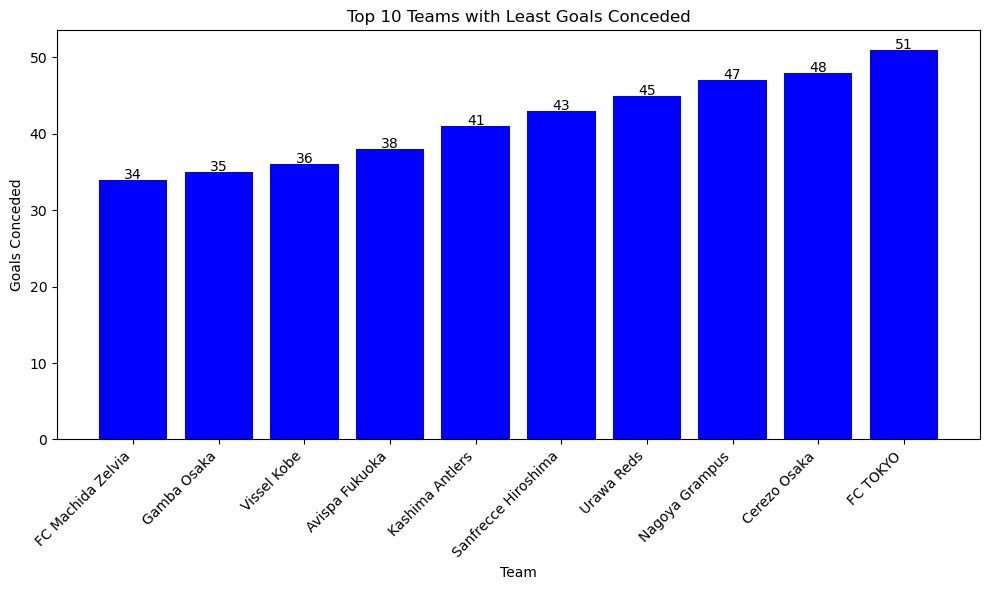

In [8]:
best_defense = df.sort_values(by='GA', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(best_defense['Team Name'], best_defense['GA'], color = 'blue')
for index, value in enumerate(best_defense['GA']):
    plt.text(index, value + 0.15, str(value), ha='center')
plt.title('Top 10 Teams with Least Goals Conceded')
plt.xlabel('Team')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

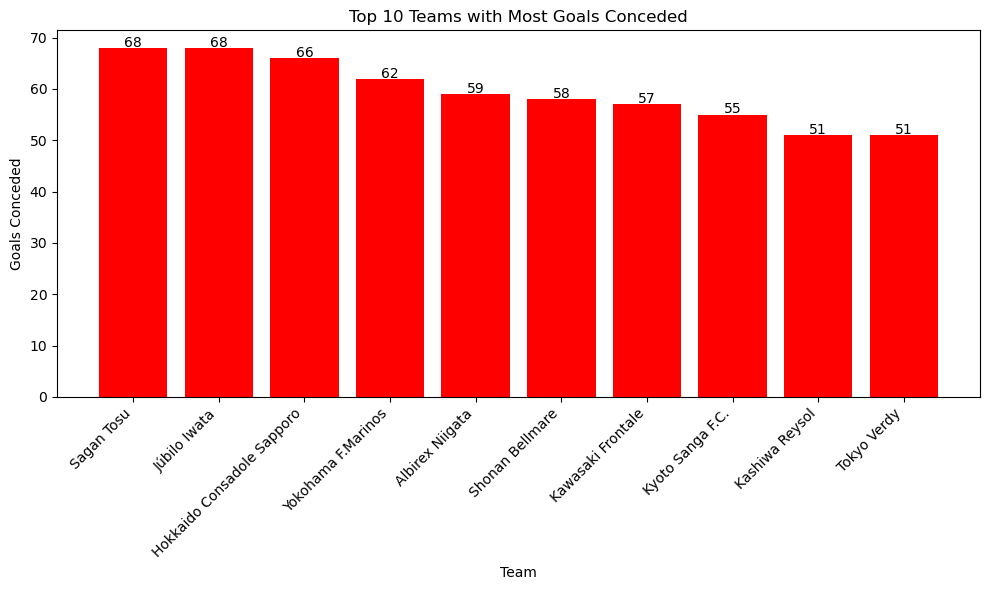

In [9]:
worst_defense = df.sort_values(by='GA', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(worst_defense['Team Name'], worst_defense['GA'], color = 'red')
for index, value in enumerate(worst_defense['GA']):
    plt.text(index, value + 0.2, str(value), ha='center')
plt.title('Top 10 Teams with Most Goals Conceded')
plt.xlabel('Team')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
grouped = df.groupby('GA')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Total Goals Conceded', 'Count of Teams', 'Team Names']

grouped = grouped.sort_values(by='Total Goals Conceded', ascending=True).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Total Goals Conceded  Count of Teams                            Team Names
                   34               1                     FC Machida Zelvia
                   35               1                           Gamba Osaka
                   36               1                           Vissel Kobe
                   38               1                        Avispa Fukuoka
                   41               1                       Kashima Antlers
                   43               1                   Sanfrecce Hiroshima
                   45               1                            Urawa Reds
                   47               1                        Nagoya Grampus
                   48               1                          Cerezo Osaka
                   51               3 Tokyo Verdy, FC TOKYO, Kashiwa Reysol
                   55               1                      Kyoto Sanga F.C.
                   57               1                     Kawasaki Frontale
            

In [11]:
def calculate_points(form):
    points = 0
    for result in form.split('-'):
        if result == 'W':
            points += 3
        elif result == 'D':
            points += 1
    return points

df['Points over the last 5 games'] = df['Form'].apply(calculate_points)

l5p = df[['Position','Team Name', 'Points over the last 5 games']].sort_values(by='Points over the last 5 games', ascending=False).reset_index(drop=True)

print_df(l5p)


 Position                  Team Name  Points over the last 5 games
        5            Kashima Antlers                            11
        9         Yokohama F.Marinos                            10
       20                 Sagan Tosu                             9
        4                Gamba Osaka                             9
        8          Kawasaki Frontale                             8
        1                Vissel Kobe                             8
        3          FC Machida Zelvia                             6
       12             Avispa Fukuoka                             6
       13                 Urawa Reds                             6
       14           Kyoto Sanga F.C.                             6
       19 Hokkaido Consadole Sapporo                             5
       10               Cerezo Osaka                             4
       15            Shonan Bellmare                             4
       11             Nagoya Grampus                          

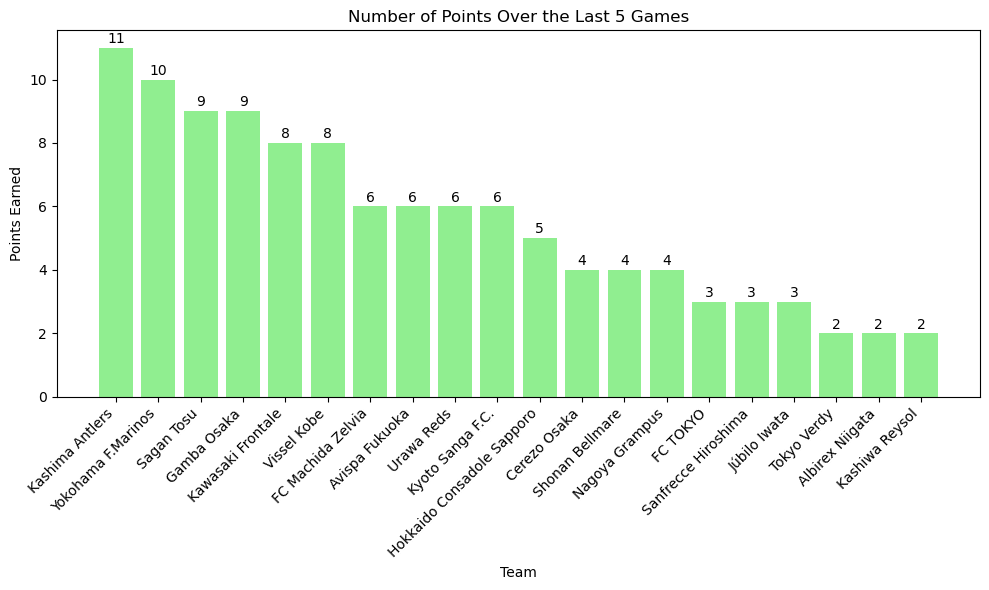

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(l5p['Team Name'], l5p['Points over the last 5 games'], color = 'lightgreen')
for index, value in enumerate(l5p['Points over the last 5 games']):
    plt.text(index,value + 0.15, str(value), ha='center')
plt.title('Number of Points Over the Last 5 Games')
plt.xlabel('Team')
plt.ylabel('Points Earned')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

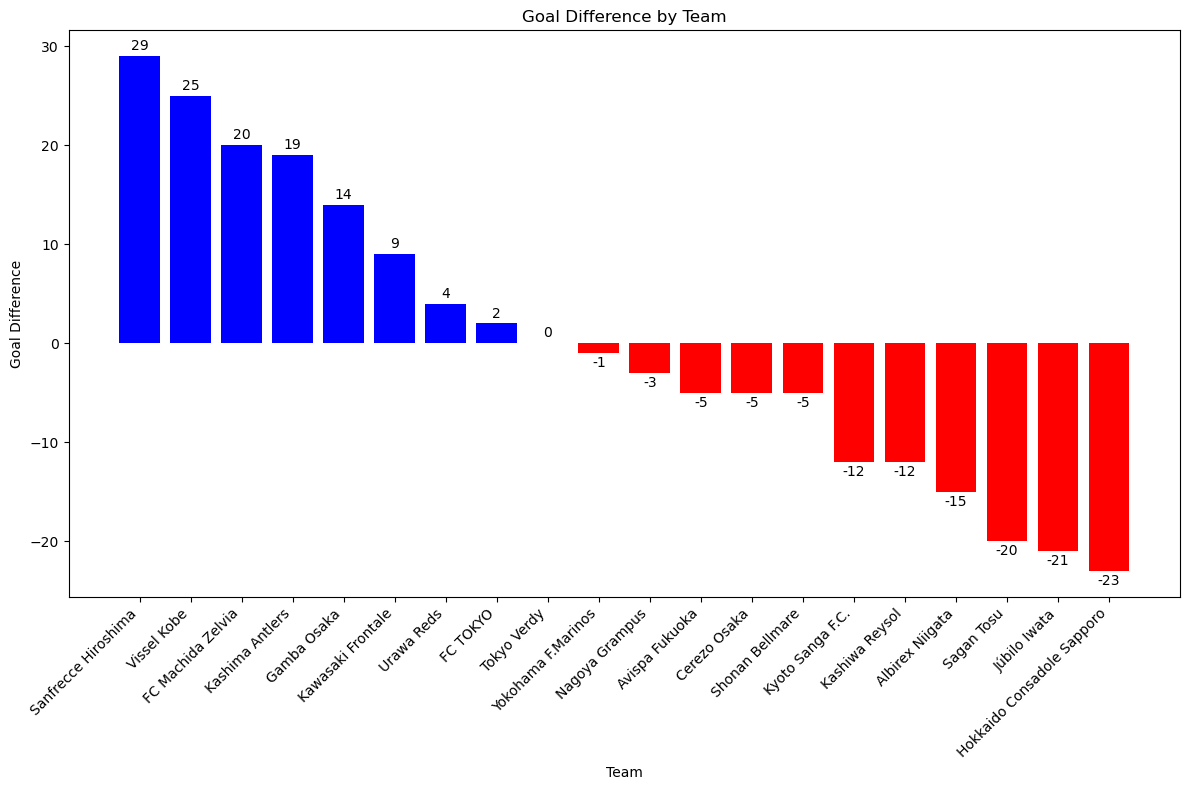

In [13]:
df2 = df.sort_values(by='GD', ascending=False)
colors = ['blue' if val >= 0 else 'red' for val in df2['GD']]
plt.figure(figsize=(12,8))
bars = plt.bar(df2['Team Name'], df2['GD'], color=colors)
for bar, value in zip(bars, df2['GD']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3 if value >= 0 else bar.get_height() - 0.3,
             str(value), ha='center', va='bottom' if value >= 0 else 'top')
plt.title('Goal Difference by Team')
plt.xlabel('Team')
plt.ylabel('Goal Difference')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
grouped = df.groupby('GD')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Goal Difference', 'Count of Teams', 'Team Names']

grouped = grouped.sort_values(by='Goal Difference', ascending=False).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Goal Difference  Count of Teams                                    Team Names
              29               1                           Sanfrecce Hiroshima
              25               1                                   Vissel Kobe
              20               1                             FC Machida Zelvia
              19               1                               Kashima Antlers
              14               1                                   Gamba Osaka
               9               1                             Kawasaki Frontale
               4               1                                    Urawa Reds
               2               1                                      FC TOKYO
               0               1                                   Tokyo Verdy
              -1               1                            Yokohama F.Marinos
              -3               1                                Nagoya Grampus
              -5               3 Cerezo Osaka, Avisp

In [15]:
grouped = df.groupby('Points')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Total Points', 'Count of Teams', 'Team Names']
grouped = grouped.sort_values(by='Total Points', ascending=False).reset_index(drop=True)
print_df(grouped)

 Total Points  Count of Teams                                          Team Names
           72               1                                         Vissel Kobe
           68               1                                 Sanfrecce Hiroshima
           66               2                      FC Machida Zelvia, Gamba Osaka
           65               1                                     Kashima Antlers
           56               1                                         Tokyo Verdy
           54               1                                            FC TOKYO
           52               3 Kawasaki Frontale, Yokohama F.Marinos, Cerezo Osaka
           50               2                      Nagoya Grampus, Avispa Fukuoka
           48               1                                          Urawa Reds
           47               1                                    Kyoto Sanga F.C.
           45               1                                     Shonan Bellmare
           42   

In [16]:
df['Points Per Game'] = df['Points'] / df['P']

df_sorted = df.sort_values(by='Points Per Game', ascending=False)

df_sorted = df_sorted[['Position','Team Name', 'Points Per Game']]

print_df(df_sorted)

 Position                  Team Name  Points Per Game
        1                Vissel Kobe         1.894737
        2        Sanfrecce Hiroshima         1.789474
        3          FC Machida Zelvia         1.736842
        4                Gamba Osaka         1.736842
        5            Kashima Antlers         1.710526
        6                Tokyo Verdy         1.473684
        7                   FC TOKYO         1.421053
        8          Kawasaki Frontale         1.368421
        9         Yokohama F.Marinos         1.368421
       10               Cerezo Osaka         1.368421
       12             Avispa Fukuoka         1.315789
       11             Nagoya Grampus         1.315789
       13                 Urawa Reds         1.263158
       14           Kyoto Sanga F.C.         1.236842
       15            Shonan Bellmare         1.184211
       16            Albirex Niigata         1.105263
       17             Kashiwa Reysol         1.078947
       18               Júbi